# Introduction


The universe evolved over time and as such the star formation rate and the metallicity of the starforming gas change. The ClassMSSFR is a script which determines the amount of star formation that went into forming a system born at redshift z, in a metallicity bin dZ.

For this script we assume that the SFR(z) and the metallicity distribution are independent of each other.
Hence the SFR is simply a normalization to the PDF of the metallicity distribution. Note that these distributions are averages over all galaxies at a specific redshift z and hence do not apply to specific galaxies.

The script allows for several combinations of distributions.
To this end we have to define the following steps


1 - Instance of the MSSFR class where we define constants

2 - Pick a SFR distribution

3 - Pick a metallicity distribution.

Note that although this is meant to be used in the cosmic integration pipeline, 
this class can be independently used to plot distributions or as input for other calculations

4 - Example of plotting



# Paths needed

In [1]:
import os

pathNoteBook     = os.getcwd()
pathClassMSSFR  = pathNoteBook + '/PythonScripts/'



# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
#custom scripts
sys.path.append(pathClassMSSFR)
import ClassMSSFR

# 1 - Instance MSSFR class

To create an instance we need to define the following parameters;

Here are the possible parameters and their default values

    verbose             =False,
    
    metallicityGrid     =None,
    
    binInLogSpace        =True,
    metallicityLowerLimit=1E-90, 
    metallicityUpperLimit=1.
                 
    logOH12sun           =8.69,     
    solarMetallicity     =0.0142, 
    cosmo                =None

verbose:
    
    If to print messages of intermediate during the calculation
    
metallicityGrid:
    
    The grid assumed in order to create the metallicity bins dZ. By default set to None
    and in a pipeline it is automatically passed from the ClassCOMPAS file.
    
    
binInLogSpace:
    
    To create the bin edges you can either choose the midpoint between Z1 and Z2 or 
    alternatively you can choose the midpoint between log(Z1) and log(Z2). Since most distributions
    work in the logZ space it seemed more appropriate. The difference is not large. Else it hints
    of having too few gridpoints in metallicity since the curve changes a lot between Z1 and Z2.
    
metallicityLowerLimit:

    Since we integrate over dZ we need to define a lower limit 
    of the metallicity mass Fraction Z in our integral.
    We set it close to zero, but non-zero to avoid division by zero errors
    
metallicityUpperLimit:

    Since we integrate over dZ we need to define a upper limit 
    of the metallicity mass Fraction Z in our integral. 
    Since a fraction cannot go higher than 1 we set it to 1.
    
logOH12sun:

    The assumed solar oxygen abundance (Asplund)
    
solarMetallicity:

    The assumed solar metallicity mass fraction (Asplund)
    
cosmo:

    The assumed universe (omegaM, Omega Lambda etc) to translate between age/distance/time.
    If None it is set to WMAP9. In the cosmic integration pipeline the class is automatically is set by the
    ClassCosmicIntegrator.

In [3]:
#We use the defaults and for illustration purposes invent our own grid

#Absolute metallicities
metallicityGrid = np.logspace(-4, -1.5,100)

MSSFR = ClassMSSFR.MSSFR(metallicityGrid=metallicityGrid)

ClassMSSFR: Remember to set self.SFRprescription() + subparts
                            self.Zprescription()   +sub-parts


# 2 - Pick a SFR distribution

In [4]:
print(MSSFR.printSFRoptions())


        Default instance:
        self.SFRprescription       = None 

        pass string
        Current Options  = 'Madau et al. (2014)'
                           'Madau et al. (2017)'
                           'Strolger et al. (2004)'
                           'Neijssel et al. (2019)'
                           'Custom SFR'

        If you use Custom SFR also set the constants
        you want to use

        self.customSFR = [a,b,c,d] 
        
        which are used in a Madau et al like formula (see source code)

        
None


In [5]:
# Based on the options above lets pick the one of the paper

MSSFR.SFRprescription = 'Neijssel et al. (2019)'

# 3 Pick a metallicity distribution

The metallicity distribution comes in two types of flavours.

###  3.1 Mass metallicity and galaxy stellar mass function

The first combines a densitity distribution of galaxy stellar masses (GSMF) 
with a mass metallicity relation (MZ) relation in order to create a metallicity density function.
In our code instead we translate from metallicity to mass to solve the integral hence we use the inverse
ZM functions. The original MZ functions are still in the source code for plotting/testing purposes


If you want to use these variations then first set the metallicity prescription to 'MZ_GSMF'


In [6]:
MSSFR.Zprescription = 'MZ_GSMF'

Then pick your favourite GSMF and MZ relation
To look at the options. Please note that not all distributions are metallicity dependent
and some rely on fits to the results of the original paper and therefore can behave poorly when pushed to extremes such as at high redshifts for example Furlong et al.

In [7]:
MSSFR.printGSMFoptions()


        If you use MZ and GSMF relations
        i.e. self.Zprescription    = 'MZ_GSMF'

        Default instance
        self.GSMFprescription      = None
        Current Options = Panter et al. (2004) Single, 
                          Furlong et al. (2015) Single,
                          Furlong et al. (2015) Double
        


In [8]:
MSSFR.printZMoptions()


        If you use MZ and GSMF relations
        i.e. self.Zprescription    = 'MZ_GSMF'

        Default instance
        self.ZMprescription        = None
        Current Options = Ma et al. (2016),
                      Langer et al. (2006)
                      Langer et al. +offset (2006)
        


In [9]:
# Set to our old default model Barrett et al

MSSFR.GSMFprescription = 'Panter et al. (2004) Single'
MSSFR.ZMprescription   = 'Langer et al. (2006)'

# 3.2 redshift dependent log-normal distribution

Instead of a MZ-relation and GSMF you can use a redshift dependent log-normal distribution (see paper)
for more details. 

To use this method set the metallicity prescription to 'logNormal'

In [10]:
MSSFR.Zprescription = 'logNormal'


Note that although the code should ignore any chose GSMF/ZM relation when using this option (or vice-versa)
it is still nicer to set those to None just in case and for clarity :). 
    

In [11]:
#then pick your favourite option for the logNormal
MSSFR.printLogNormaloptions()


        If you use Log normal 
        i.e. self.Zprescription    = 'logNormal'

        Default instance
        self.logNormalPrescription      = None
        Current Options = 'Neijssel Phenomenological'
                          'Custom Phenomenological'

        If you use Custom Phenomenological remember to 
        additionally set 

        self.customLogNormal = [Z0, alpha, sigma]
        


In [12]:
MSSFR.logNormalPrescription ='Neijssel Phenomenological'

del MSSFR

# 4 Example of accessing function /plotting

The MSSFR class also has the function to return the fraction of SFR in a metallicity bin.

    MSSFR.returnMSSFR(self, metallicity=None, agesBirth=None, redshiftBirth=None)

The code is constructed such that it calculates the MSSFR for all systems coming from a specific metallicity given that you know their agesBirth or redshiftBirth (depending on the chosen MSSFR you need one or the other)

Note that if we define our own grid of metallicities and time at which we want to know the MSSFR 
then we can use this same function to visualise our assumed distribution.
Of course we can also directly calculate any subfunctions to plot them :)


In [13]:
#lets start from scratch



In [14]:
metallicityGrid = np.logspace(-4, -1.5,100)

MSSFR = ClassMSSFR.MSSFR(metallicityGrid=metallicityGrid)
#SFR
MSSFR.SFRprescription = 'Neijssel et al. (2019)'

#metallicity
MSSFR.Zprescription = 'logNormal'
MSSFR.logNormalPrescription ='Neijssel Phenomenological'



ClassMSSFR: Remember to set self.SFRprescription() + subparts
                            self.Zprescription()   +sub-parts


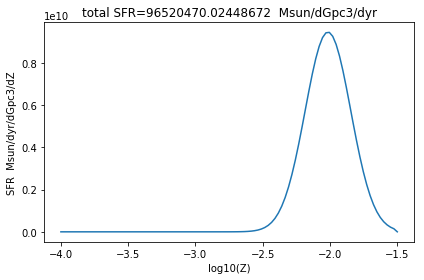

In [15]:
# What is our Z distribution at redshift 2

metallicityGrid = np.logspace(-4, -1.5,100)


SFRrate = np.zeros(len(metallicityGrid))

#our prescriptions do not need agesBirth only 
#redshift but require dummy value
redshift  = np.array([2])
agesBirth = redshift

for nrZ, Z in enumerate(metallicityGrid):
    SFRrate[nrZ] = MSSFR.returnMSSFR( metallicity=Z,\
                   agesBirth=agesBirth, redshiftBirth=redshift)
    
    
bins  = MSSFR.metallicityBinEdges
dZ    = np.diff(bins)

SFR_dZ = np.divide(SFRrate, dZ)
    
fig, axes = plt.subplots(1,1)

axes.plot(np.log10(metallicityGrid), SFR_dZ)
axes.set_title('total SFR=%s  Msun/dGpc3/dyr' %(np.sum(SFRrate)))
axes.set_xlabel('log10(Z)')
axes.set_ylabel('SFR  Msun/dyr/dGpc3/dZ')
plt.tight_layout()
plt.show()